# Wrangling data

## Gathering

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\COGNORISE\\Second task\\cereal.csv")

## Assessing and Cleaning

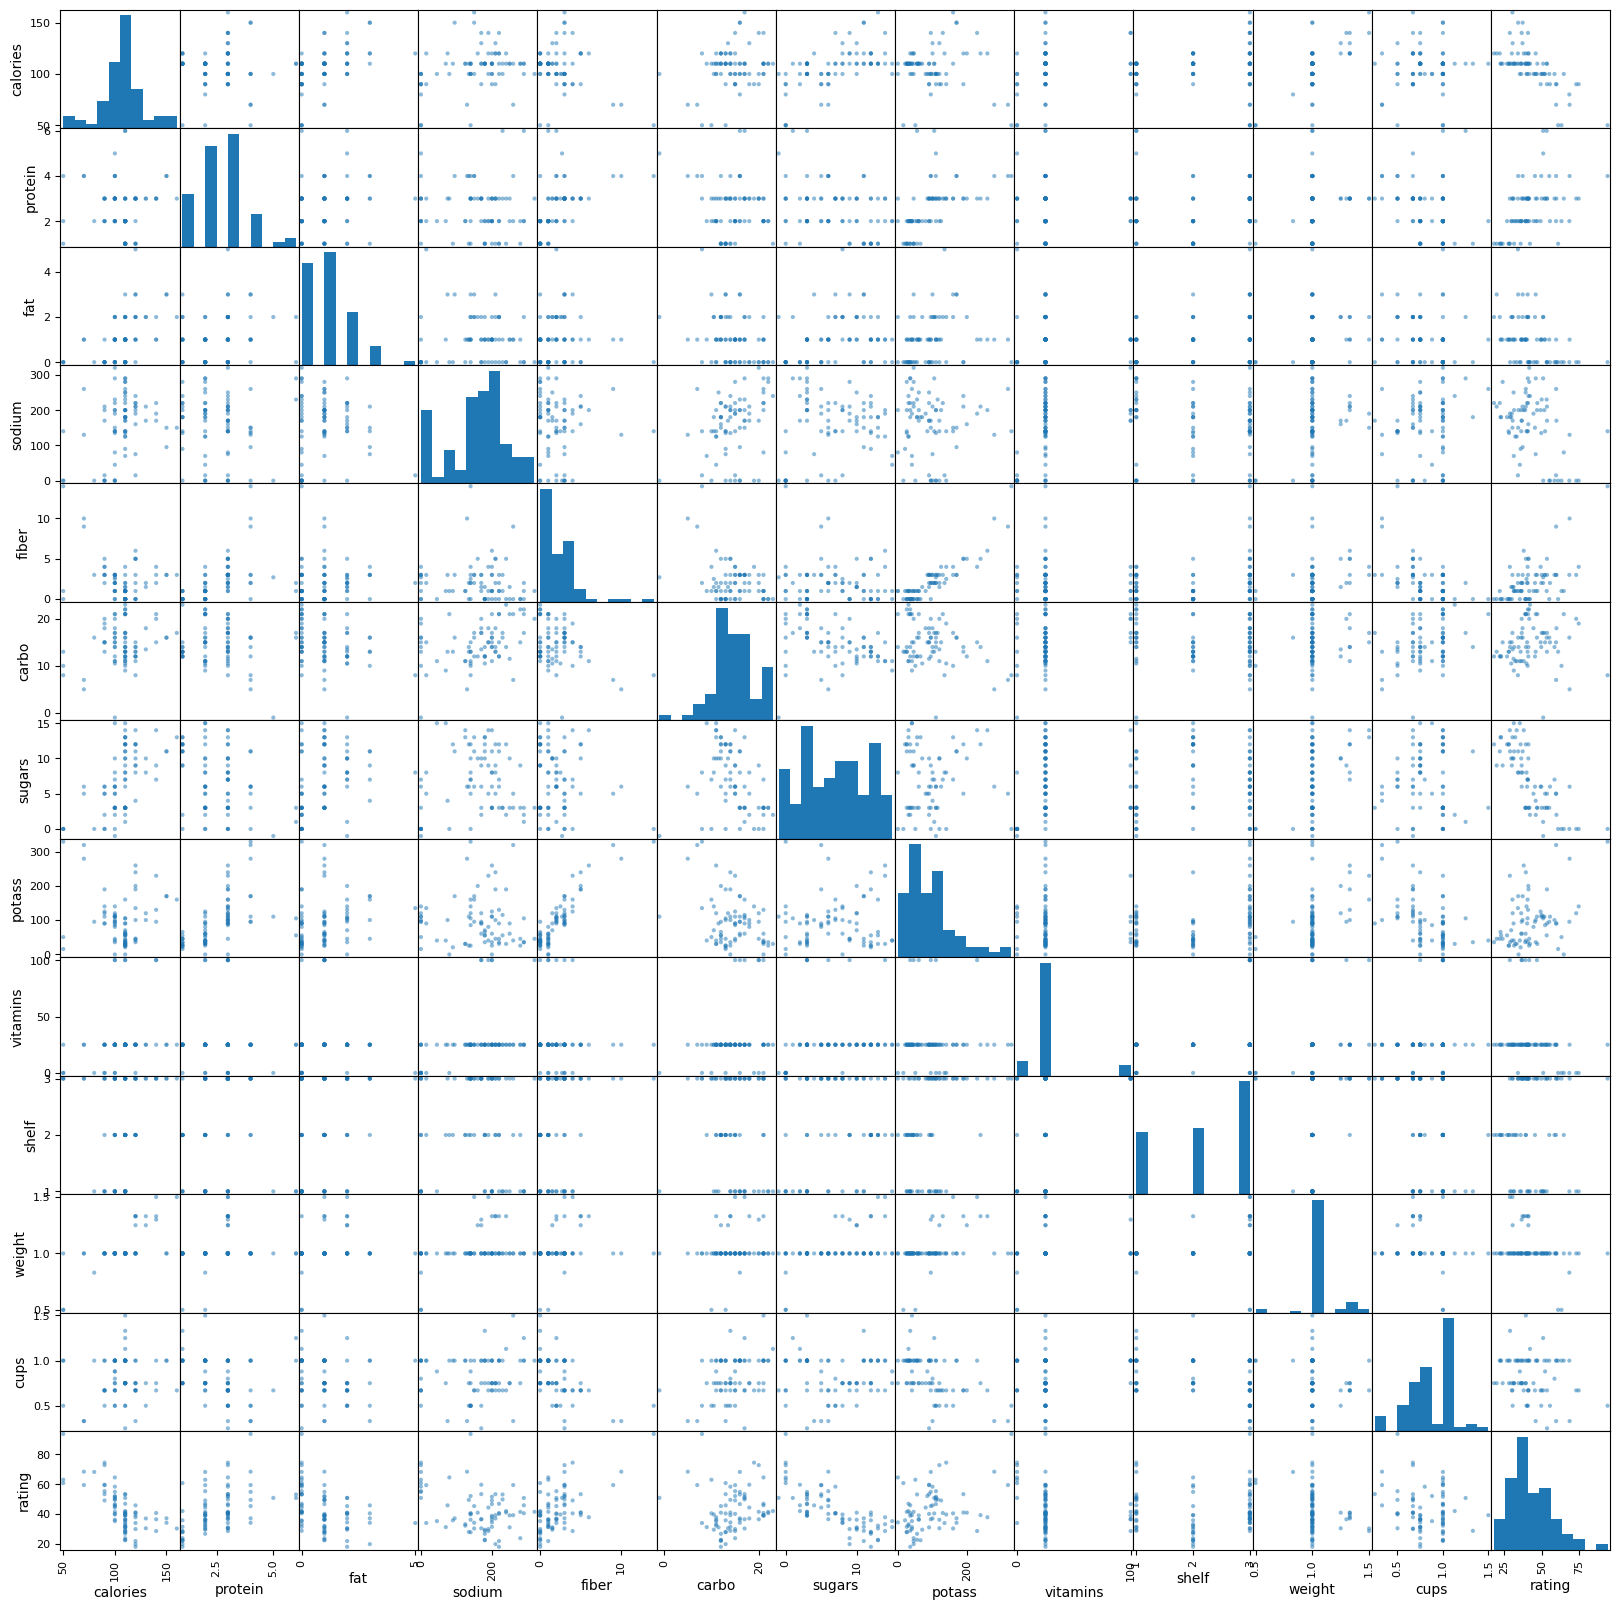

In [28]:
pd.plotting.scatter_matrix(df , figsize=(20,20));

In [29]:
df.describe()
# there some cereal where carbo sugars and potass = -1 ans it is impossible so we will replace it by one

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [30]:
df = df.replace(-1 , 1 )

In [31]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,1,25,3,1.0,0.75,34.384843


In [32]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [33]:
df.sample()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
32,Grape Nuts Flakes,P,C,100,3,1,140,3.0,15.0,5,85,25,3,1.0,0.88,52.076897


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [35]:
df.isna().sum().sum()

0

In [36]:
df.duplicated().sum()

0

# Visulisation and analysing


### First

- Did you ask yourself how many products did each manifucturer produce ? Here we answer this .
- what is the using of this ? we can choose our manifucturer by who produces the most of products 

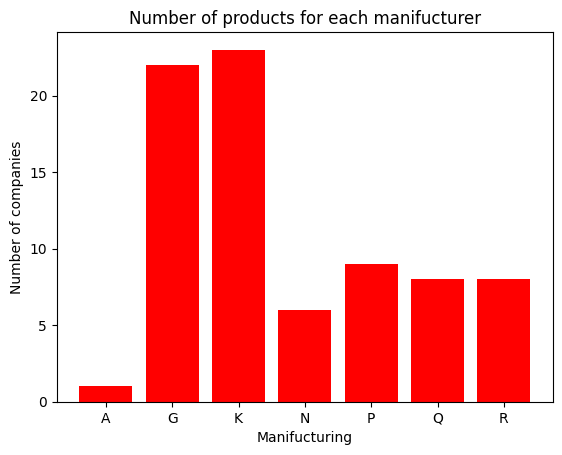

In [37]:
mfr_companynom = df.groupby(df["mfr"])["name"].count()
plt.xlabel("Manifucturing")
plt.ylabel("Number of companies")
plt.title("Number of products for each manifucturer")
plt.bar(mfr_companynom.index , mfr_companynom.values , color = "red" )
plt.show()
# The highest Manufacturer of cereal is Kellogs
# The lowest Manufacturer of cereal is American Home Food Products

### Second

- what are worst and highest product and there components? 
- avoid quantities of components of bad ones and use the quantities of components of good by studying the way of preperation, too we can make good product

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
1,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
2,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
3,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
4,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


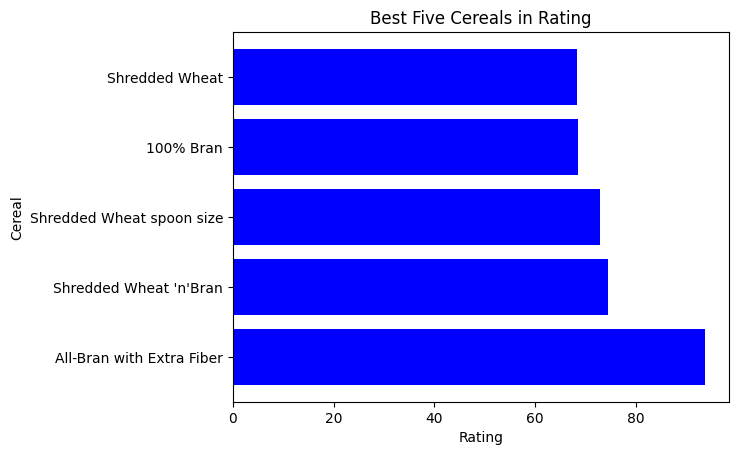

In [38]:
desc_name_rate = df.sort_values("rating" , ascending=False , ignore_index=True).head()
plt.xlabel("Rating")
plt.ylabel("Cereal")
plt.title("Best Five Cereals in Rating")
plt.barh(desc_name_rate["name"] , desc_name_rate["rating"] , color = "b")
# The customers prefer these cereal so what is the components of each of them
desc_name_rate 
# These are ingredients of the best 5 cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
1,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
2,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
3,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513
4,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446


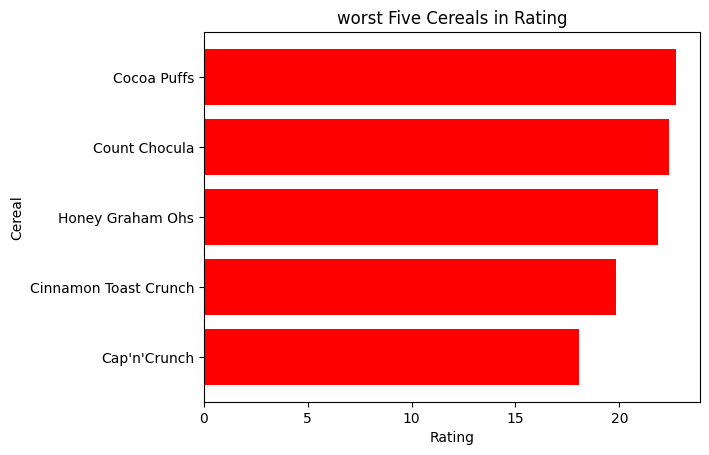

In [39]:
asc_name_rate = df.sort_values("rating" , ascending=True , ignore_index=True).head()
plt.xlabel("Rating")
plt.ylabel("Cereal")
plt.title("worst Five Cereals in Rating")
plt.barh(asc_name_rate["name"] , asc_name_rate["rating"] , color = "red")
# The customers prefer these cereal so what is the components of each of them
asc_name_rate 
# These are ingredients of the best 5 cereals

### Third

Hist to find the best quantities of comonents of cereal

In [40]:
def hist_me (aspect , num ):
    plt.subplot(2 , 5 ,num)
    plt.title(aspect)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.hist(df[aspect])


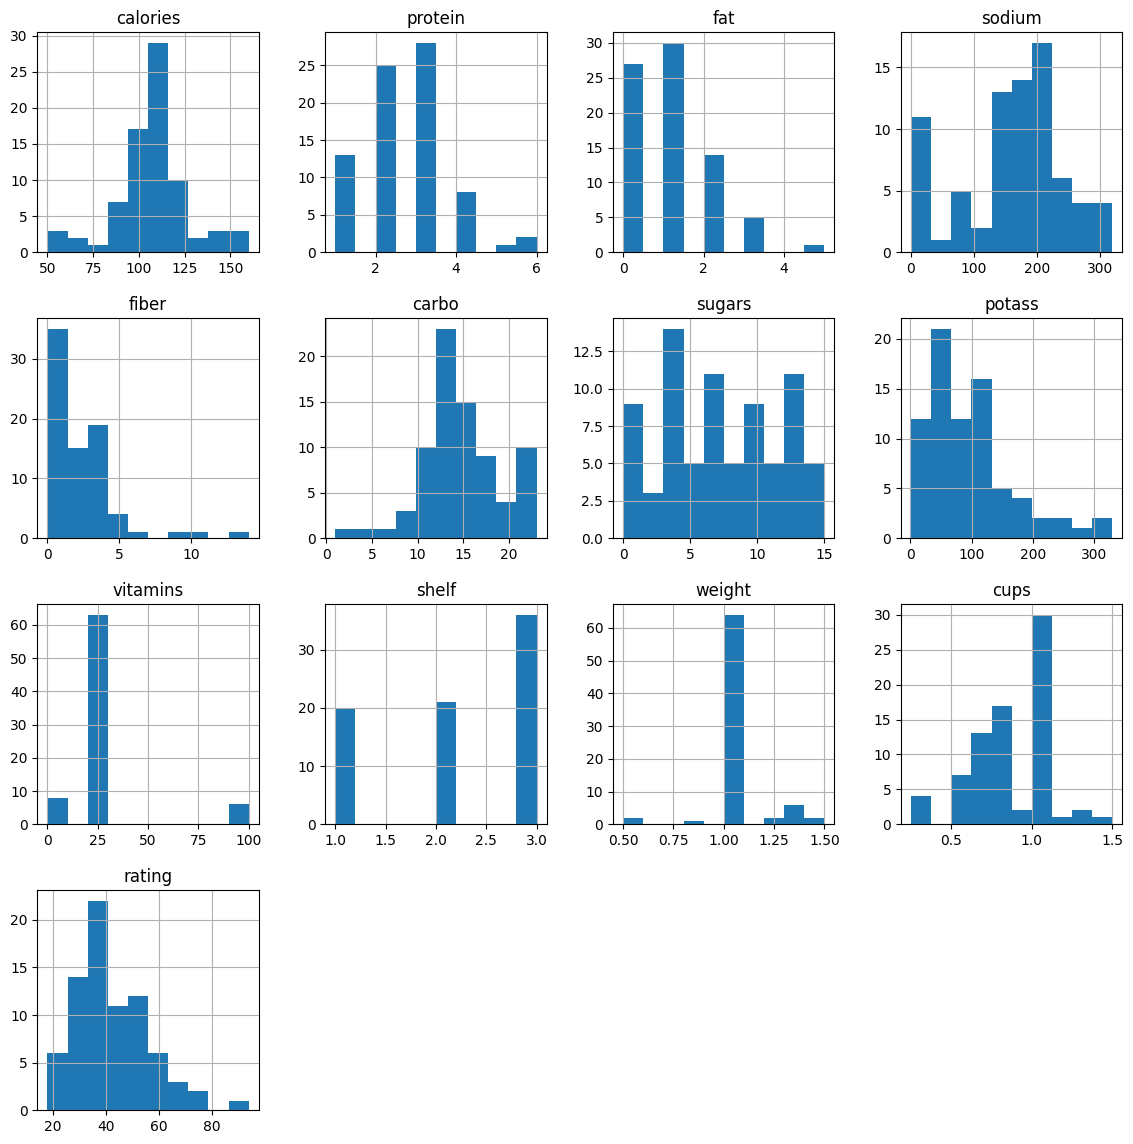

In [41]:
df.hist(figsize = (14,14));
# best amount is one cup and between 110 and 130 calories protein 3 sodium 190 fats between 1 and 2  

### fourth

relation between rating and ingredients of product and this is like an approal for the thid visualisation

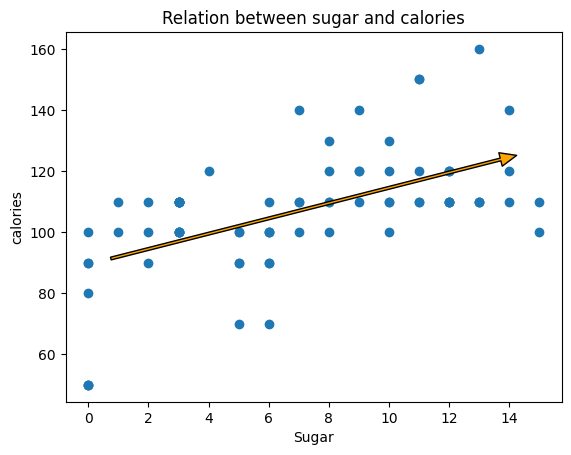

In [42]:
x= df["sugars"] 
y =  df["calories"]
plt.xlabel("Sugar")
plt.ylabel("calories")
plt.title("Relation between sugar and calories")
slope, intercept = np.polyfit(x, y, 1)  # '1' means a linear fit (degree 1)
trendline = slope * x + intercept
plt.annotate(
    '',  # No text, just the arrow
    xy=(max(x), slope * max(x) + intercept),  # End point of the arrow (the end of the trend line)
    xytext=(min(x), slope * min(x) + intercept),  # Start point of the arrow (the start of the trend line)
    arrowprops=dict(facecolor='orange', shrink=0.05, width=2, headwidth=10)
)
plt.scatter(x,y)


### fifth

Which cereals are high in protein but low in sugar?

In [43]:
mean_protein = df["protein"].mean()
mean_sugar = df["sugars"].mean()

In [45]:
df[(df["protein"] > mean_protein) & (df["sugars"] < mean_sugar) ]["name"]

0                     100% Bran
2                      All-Bran
3     All-Bran with Extra Fiber
9                   Bran Flakes
11                     Cheerios
20       Cream of Wheat (Quick)
32            Grape Nuts Flakes
33                   Grape-Nuts
34           Great Grains Pecan
41                         Life
43                        Maypo
50            Nutri-grain Wheat
53                   Product 19
56           Quaker Oat Squares
57               Quaker Oatmeal
64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
67                    Special K
71            Total Whole Grain
74                   Wheat Chex
75                     Wheaties
Name: name, dtype: object

the most suitable one for gym 

In [47]:

# Find the cereal with the least sugar
least_sugar_value = df['sugars'].min()

# Filter cereals with the least sugar
least_sugar_cereals = df[df['sugars'] == least_sugar_value]

# Find the cereal with the highest protein among those with the least sugar
highest_protein_cereal = least_sugar_cereals[least_sugar_cereals['protein'] == least_sugar_cereals['protein'].max()]

# Display the result
print("Cereal with the least sugar and highest protein:")
print(highest_protein_cereal[['name', 'sugars', 'protein']])

Cereal with the least sugar and highest protein:
                        name  sugars  protein
3  All-Bran with Extra Fiber       0        4
